In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
#Reading the file and checking first five rows
df = pd.read_csv("Independent_Medical_Review.csv")
df.head()

,Reference ID,Report Year,Diagnosis Category,Diagnosis Sub Category,Treatment Category,Treatment Sub Category,Determination,Type,Age Range,Patient Gender,Findings
0,MN16-22639,2016,Infectious,Hepatitis,Pharmacy/Prescription Drugs,Anti-virals,Overturned Decision of Health Plan,Medical Necessity,41-50,Male,Nature of Statutory Criteria/Case Summary: An ...
1,MN16-22638,2016,Mental,Eating Disorder,Mental Health Treatment,Residential Treatment Center - Admission,Upheld Decision of Health Plan,Medical Necessity,21-30,Female,Nature of Statutory Criteria/Case Summary: An...
2,MN16-22637,2016,Autism Spectrum,Autism-PDD-NOS,Autism Related Treatment,Speech Therapy,Upheld Decision of Health Plan,Medical Necessity,0-10,Female,Nature of Statutory Criteria/Case Summary: Th...
3,EI16-22636,2016,Prevention/Good Health,NaN,"Diagnostic Imaging, Screening and Testing",Mammography,Overturned Decision of Health Plan,Experimental/Investigational,65+,Female,Nature of Statutory Criteria/Case Summary: An ...
4,EI06-5319,2006,Cardiac/Circulatory,NaN,Cardio Vascular,NaN,Upheld Decision of Health Plan,Experimental/Investigational,51-64,Male,Physician 1: The patient is a 62-year-old male...


In [3]:
#Checking dimensions
df.shape

(19245, 11)

In [4]:
#Checking column names
df.columns.values

array(['Reference ID', 'Report Year', 'Diagnosis Category',
       'Diagnosis Sub Category', 'Treatment Category',
       'Treatment Sub Category', 'Determination', 'Type', 'Age Range',
       'Patient Gender', 'Findings'], dtype=object)

<AxesSubplot:>

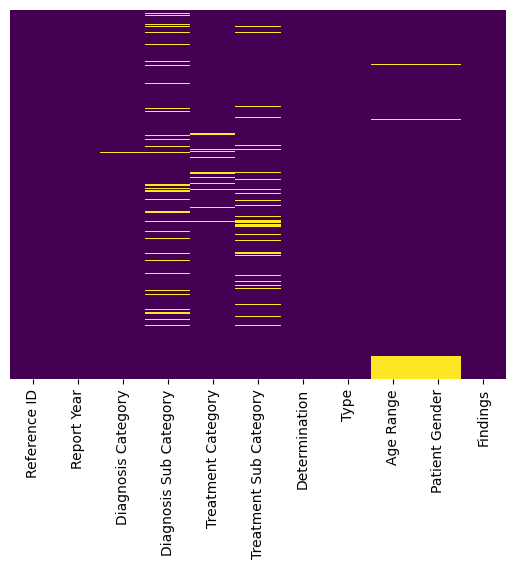

In [5]:
#Checking missing values
import seaborn as sns
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

Point to note where we have rows empty for age range, there is no Patient Gender information available.

In [6]:
#Checking data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19245 entries, 0 to 19244
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Reference ID            19245 non-null  object
 1   Report Year             19245 non-null  int64 
 2   Diagnosis Category      19186 non-null  object
 3   Diagnosis Sub Category  17341 non-null  object
 4   Treatment Category      18795 non-null  object
 5   Treatment Sub Category  17977 non-null  object
 6   Determination           19245 non-null  object
 7   Type                    19245 non-null  object
 8   Age Range               18035 non-null  object
 9   Patient Gender          18035 non-null  object
 10  Findings                19225 non-null  object
dtypes: int64(1), object(10)
memory usage: 1.6+ MB


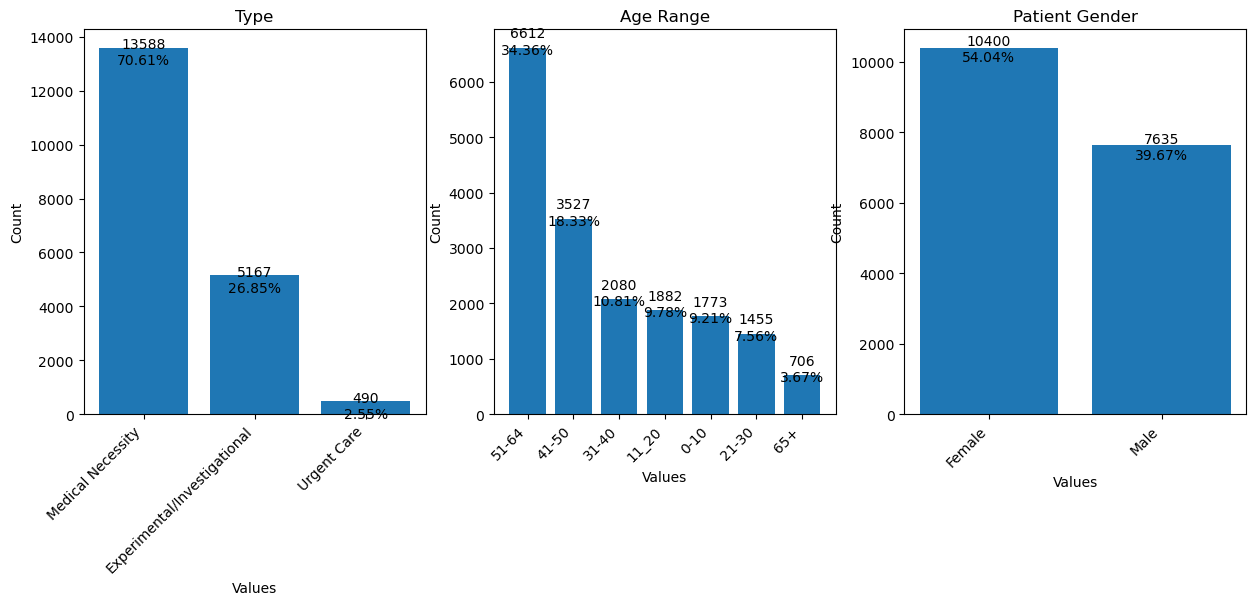

In [7]:
#Visualizing bar chart for each categorical feature.
import matplotlib.pyplot as plt

#Listing all categorical_columns
cc = ["Type","Age Range",
     "Patient Gender"] 
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Loop through each column
# Loop through each column
for i, col in enumerate(cc):
    # Group the data by the column and count the number of occurrences of each value
    counts = df[col].value_counts()
    # Compute the total number of rows
    total_rows = len(df)
    # Compute the percentage of rows for each value
    percent = counts / total_rows * 100
    # Create a bar chart in the corresponding subplot
    axs[i].bar(counts.index, counts.values)
    # Set the title and axis labels
    axs[i].set_title(col)
    axs[i].set_xlabel('Values')
    axs[i].set_ylabel('Count')
    # Tilt the x-axis labels by 45 degrees
    plt.setp(axs[i].get_xticklabels(), rotation=45, ha='right')
    # Add annotations for each bar
    for j, count in enumerate(counts):
        pct = percent[j]
        axs[i].text(counts.index[j], count + 0.02 * total_rows, f'{count}\n{pct:.2f}%', ha='center', va='top')

# Show the chart
plt.show()


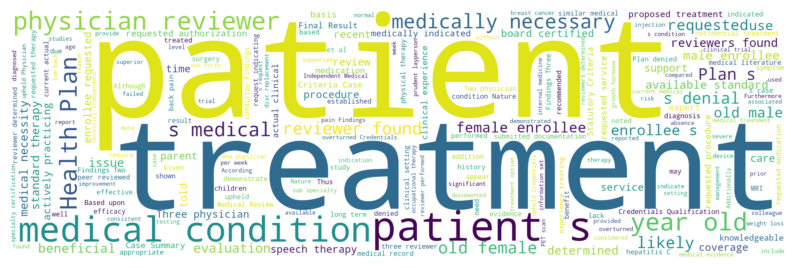

In [8]:
#Additing a word clound of Findings
from wordcloud import WordCloud
# Combine all the text in the x column into a single string
text = ' '.join(df['Findings'].astype("str").values)

# Create a WordCloud object
wordcloud = WordCloud(width=2500, height=800, background_color='white', min_font_size=0.5)

# Generate a word cloud from the text
wordcloud.generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()